In [2]:
import pandas as pd

In [4]:
hours_price = pd.read_csv("House_Price-210417-100254.csv")

In [5]:
test_data = pd.read_csv("test-210417-100254.csv")

In [50]:
test_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
training_data = pd.read_csv("train-210417-100254.csv")

In [11]:
hours_price.head()

,Id,Street,Shape,Utilities,OverallQual,YearBuilt,LivArea,Bath,Kitchen,Rooms,Parking Space,PriceCategory
0,1,Pave,Reg,AllPub,7,2003,1710,2,1,8,2,high
1,2,Pave,Reg,AllPub,6,1976,1262,2,1,6,2,medium
2,3,Pave,IReg,AllPub,7,2001,1786,2,1,6,2,high
3,4,Pave,IReg,AllPub,7,1915,1717,1,1,7,3,medium
4,5,Pave,IReg,AllPub,8,2000,2198,2,1,9,3,high


In [13]:
columns = hours_price.columns
for col in columns:
    print(col, hours_price[col].nunique())

Id 1460
Street 2
Shape 2
Utilities 2
OverallQual 10
YearBuilt 112
LivArea 861
Bath 4
Kitchen 4
Rooms 12
Parking Space 5
PriceCategory 3


In [14]:
hours_price['PriceCategory'].value_counts()

medium    660
high      435
low       365
Name: PriceCategory, dtype: int64

In [15]:
import matplotlib.pyplot as plt

<AxesSubplot:>

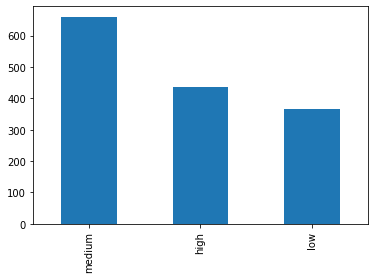

In [16]:
hours_price['PriceCategory'].value_counts().plot(kind = 'bar')

In [18]:
#we can ignore this feature as it is so small and not really impacting the end result
hours_price['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [20]:
hours_price.columns

Index(['Id', 'Street', 'Shape', 'Utilities', 'OverallQual', 'YearBuilt',
       'LivArea', 'Bath', 'Kitchen', 'Rooms', 'Parking Space',
       'PriceCategory'],
      dtype='object')

In [21]:
hours_price['Shape'].value_counts()

Reg     925
IReg    535
Name: Shape, dtype: int64

<AxesSubplot:>

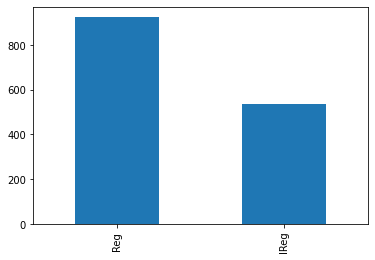

In [22]:
hours_price['Shape'].value_counts().plot(kind='bar')

<AxesSubplot:>

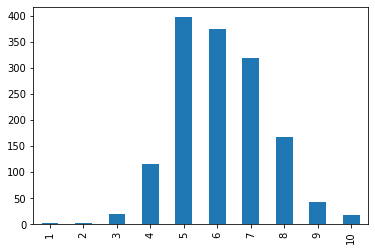

In [26]:

#user Sort index
hours_price['OverallQual'].value_counts().sort_index().plot(kind='bar')

In [30]:
import statsmodels.api as sm
import pylab as py

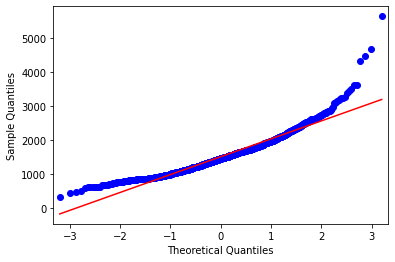

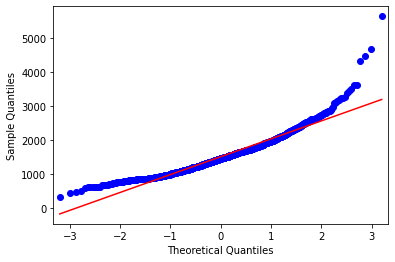

In [31]:
sm.qqplot(hours_price['LivArea'], line='s')

In [29]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the 'c:\Users\Neelam\Desktop\Desktop\Python\Video\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [34]:
def rule_based_room(x):
    if(x <= 5):
        return 'low'
    elif((x == 6) | (x==7)):
        return 'medium'
    else:
        return 'high'

In [35]:
hours_price['prediction'] = hours_price['Rooms'].apply(rule_based_room)

In [37]:
hours_price[hours_price['PriceCategory'] == hours_price['prediction']].shape[0]/hours_price.shape[0]

0.55

In [38]:
def parking_rule_based_room(x):
    if(x <= 1):
        return 'low'
    elif(x == 2):
        return 'medium'
    else:
        return 'high'

In [39]:
hours_price.columns


Index(['Id', 'Street', 'Shape', 'Utilities', 'OverallQual', 'YearBuilt',
       'LivArea', 'Bath', 'Kitchen', 'Rooms', 'Parking Space', 'PriceCategory',
       'prediction'],
      dtype='object')

In [43]:
hours_price['parking_prediction'] = hours_price['Parking Space'].apply(parking_rule_based_room)

In [44]:
hours_price[hours_price['PriceCategory'] == hours_price['parking_prediction']].shape[0]/hours_price.shape[0]

0.6123287671232877

In [48]:
def rule_based_ps_la(row):
    x1=row[0]
    x2=row[1]

    if(x1>3):
        return 'high'
    elif((x1==2) & (x2 >1600)):
        return 'high'
    elif((x1==2) & (x2 <=900)):
        return 'low'
    elif(x1==2):
        return 'medium'
    elif((x1==1) & (x2 >1200)):
        return 'medium'
    else:
        return 'low'

In [49]:
hours_price['prediction'] = hours_price[['Parking Space', 'LivArea']].apply(rule_based_ps_la, axis=1)